In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv("../data/Salary.csv")

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


## EDA

In [20]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

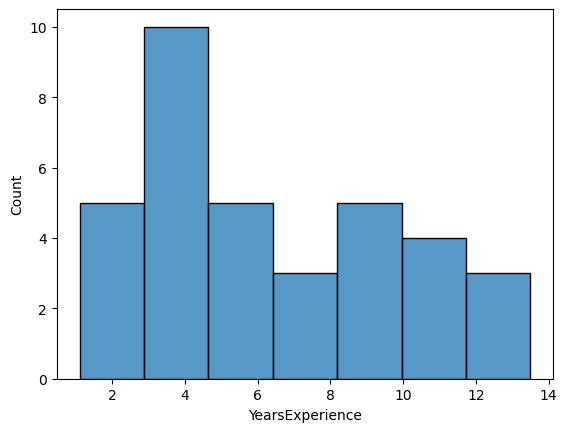

In [21]:
sns.histplot(x="YearsExperience", data=df)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

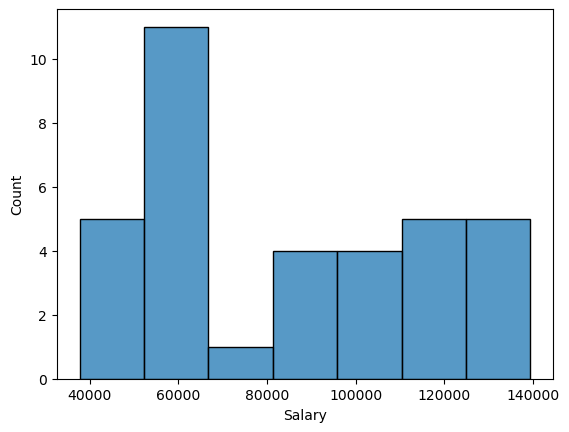

In [22]:
sns.histplot(x="Salary", data=df)

Text(0.5, 1.0, 'Years of Experience vs Salary')

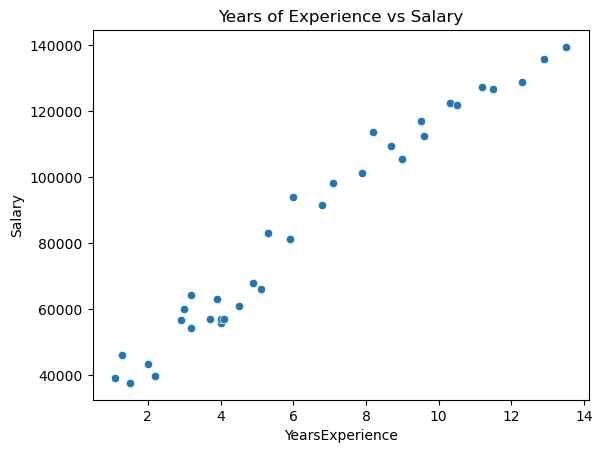

In [23]:
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
plt.title("Years of Experience vs Salary")

## Model

In [24]:
X = df.YearsExperience.values.reshape(-1, 1)
y = df.Salary.values.reshape(-1, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  7467.381824057221


In [33]:
y_pred = lr.predict(X_train)

print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

RMSE:  5557.784071102795


On average, the model is off by 7466 when predicting new values.

In [31]:
y_full = lr.predict(X)

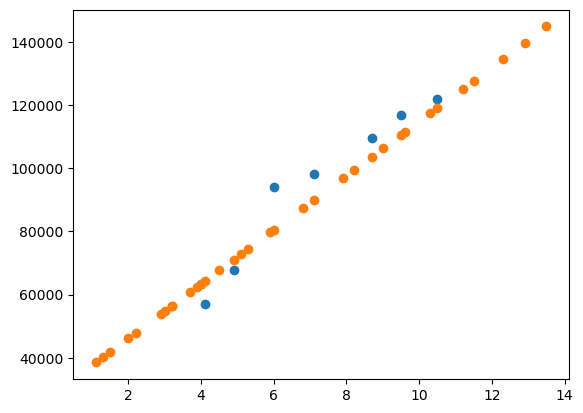

In [32]:
plt.scatter(x=X_test, y=y_test, label="Actual")
plt.scatter(x=X, y=y_full, label="Train")